In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [2]:
df= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Top Five rows 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

df.dtypes

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper 

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month 

Text(0.5, 1.02, 'Count of Target Variable per Category')

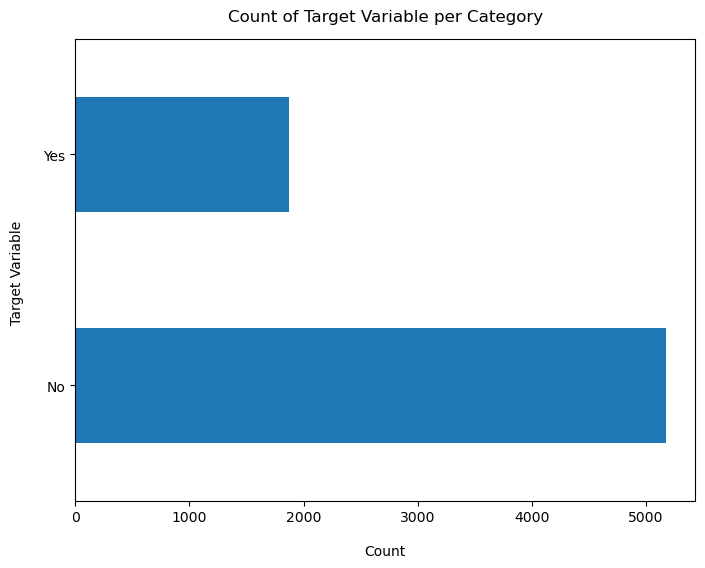

In [7]:
df["Churn"].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count" , labelpad=14)
plt.ylabel("Target Variable ", labelpad=14)
plt.title("Count of Target Variable per Category", y=1.02)

Percentage count of Churn 

In [8]:
100*df["Churn"].value_counts()/ len(df["Churn"])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

* Our Data is highly imbalanced , ratio = 73 : 27 
* So we analyse the data with other features while taking the target values separately to get some insights.

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Find percentage of missing values

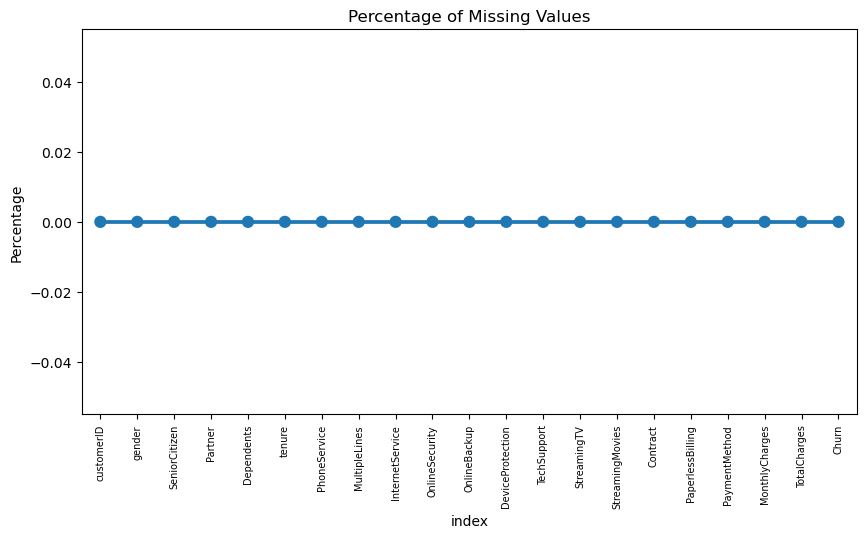

In [10]:
missing = pd.DataFrame((df.isnull().sum())*100/ df.shape[0]).reset_index()
plt.figure(figsize=(10,5))
ax = sns.pointplot(data=missing,x='index', y=0)
plt.xticks(rotation = 90 , fontsize= 7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

# Data Cleaning
1. Create a copy of base data for manupulation & processing 


In [11]:
df1 = df.copy()

2. Total Charges should be numeric amount. let's convert it to numerical data type

In [12]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
df1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. As we can see there are 11 missing values in TotalCharges columns. let's check these records

In [13]:
df1[df1['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


## 4. Missing Value Tretement
Since the % of these records compared to total dataset is very low ie 0.15% it is safe to ignore them form further precoessing

In [14]:
 df1.dropna(how='any', inplace=True)

5. Divide Customer into bins based on tenure e.g.. for tenure < 12 months: assign a tenure group if 1-12 , for tenure between 1 to 2 yers , tenure group of 13 - 24 ; so on...

In [15]:
df['tenure'].max()

72

In [16]:
labels =["{0} - {1}".format(i, i +11) for i in range(1,72,12)]

df1['tenure_group'] = pd.cut(df1['tenure'], bins=range(1,80,12), right=False, labels=labels)

In [17]:
df1['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

6. Remove columns not require for processing

In [18]:
df1.drop(['customerID', 'tenure'], axis=1, inplace=True)
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
2072,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.35,779.20,No,37 - 48
4989,Female,0,No,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.80,201.95,No,1 - 12
3655,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.40,641.15,No,25 - 36
5288,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.65,79.65,Yes,1 - 12
2144,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.50,147.75,No,1 - 12


# Data Exploration
1. Plot Distribution of individual predictors by churn 


# Univariate Analysis 
1. enumerate give index, and predictor having column name that we are passing to count plot  

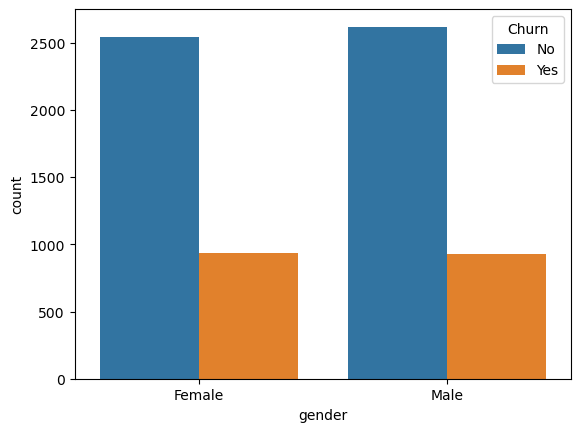

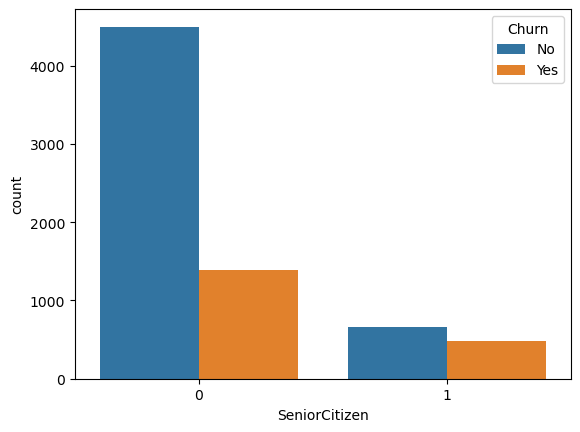

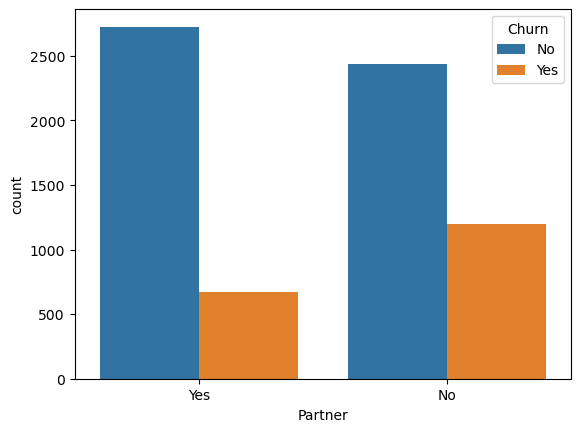

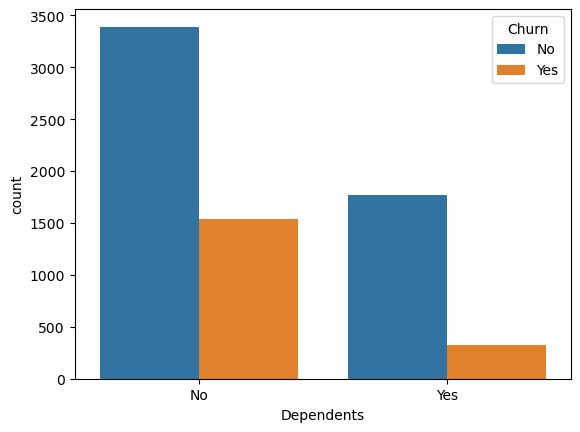

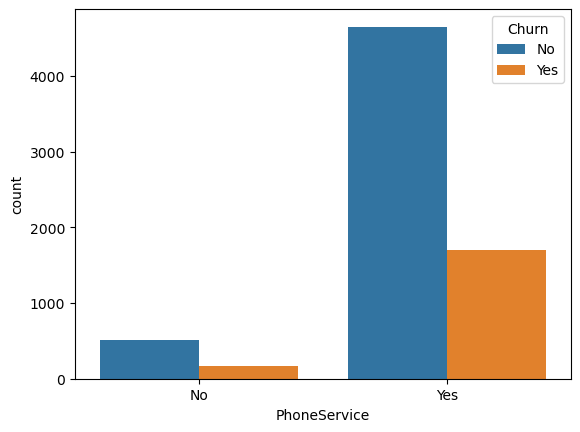

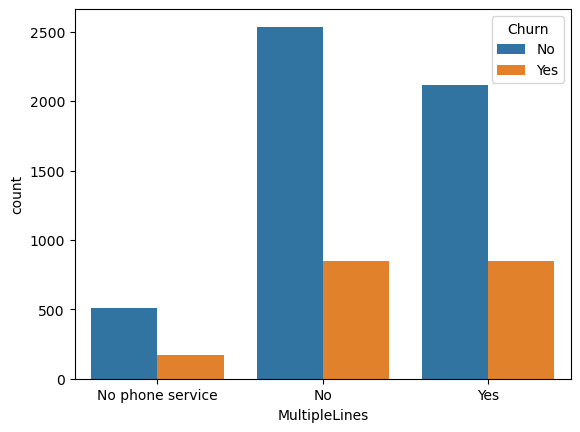

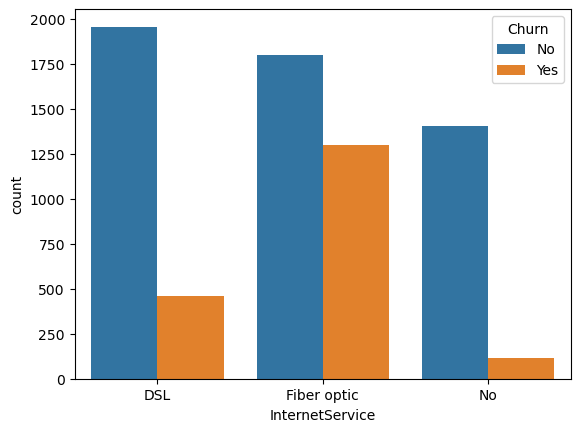

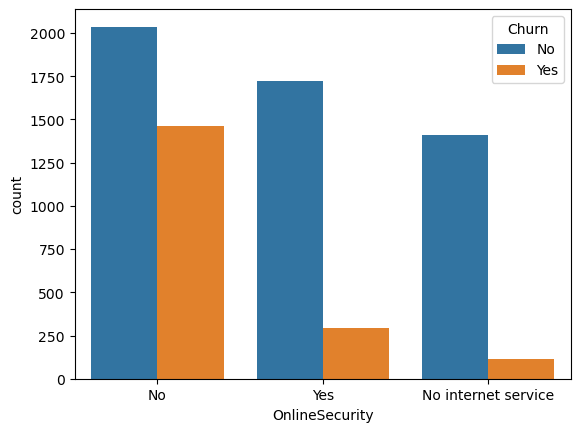

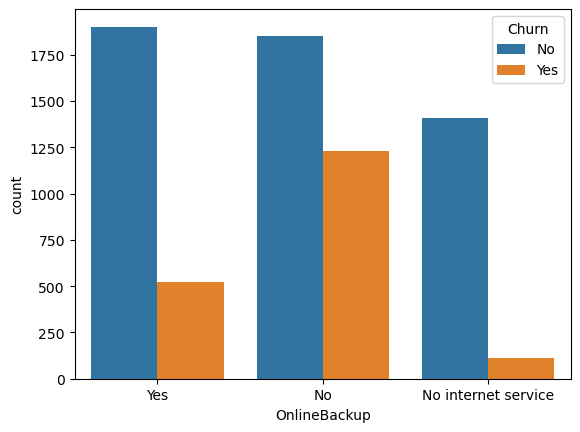

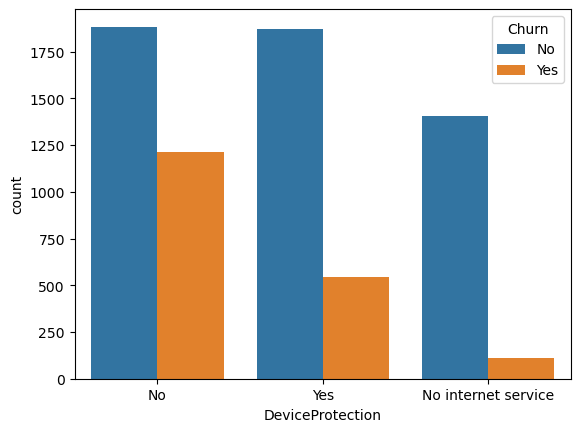

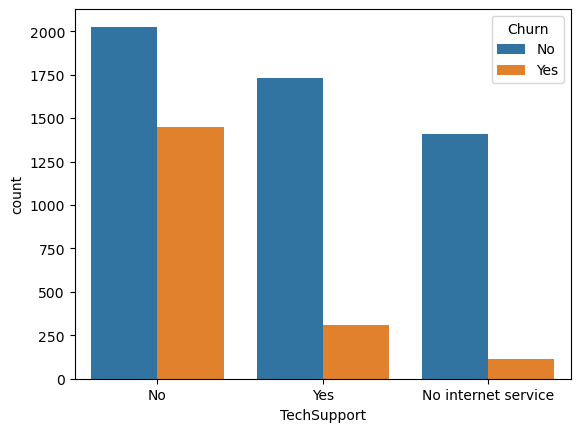

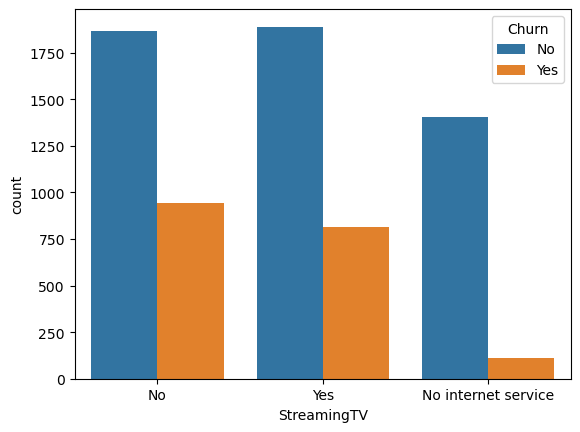

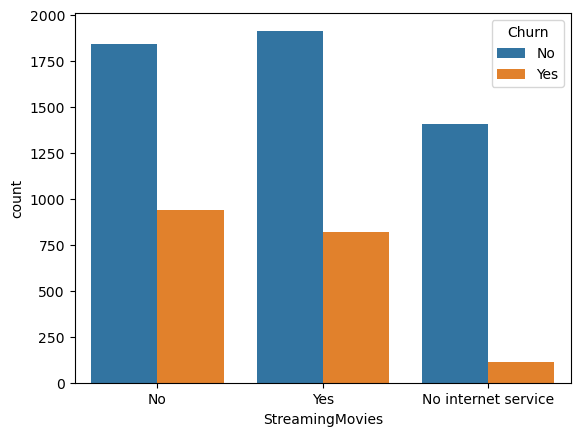

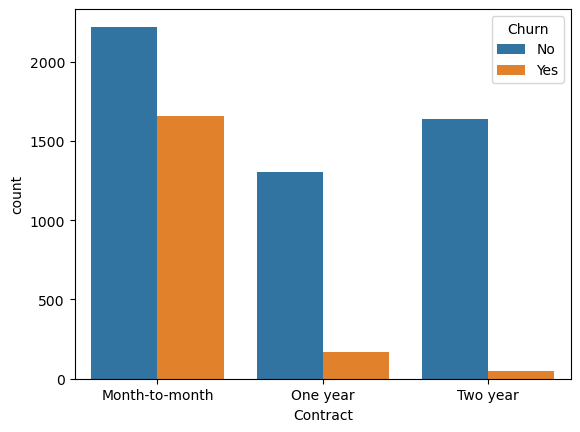

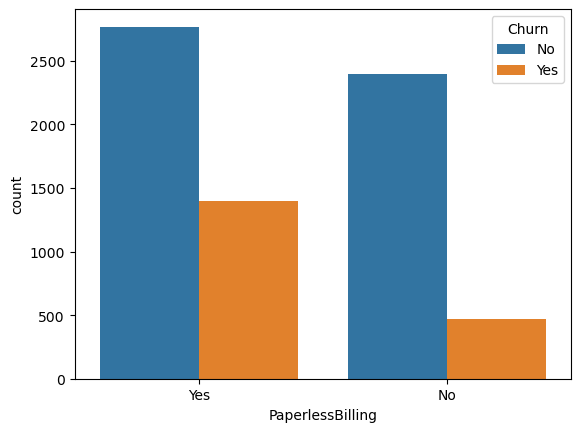

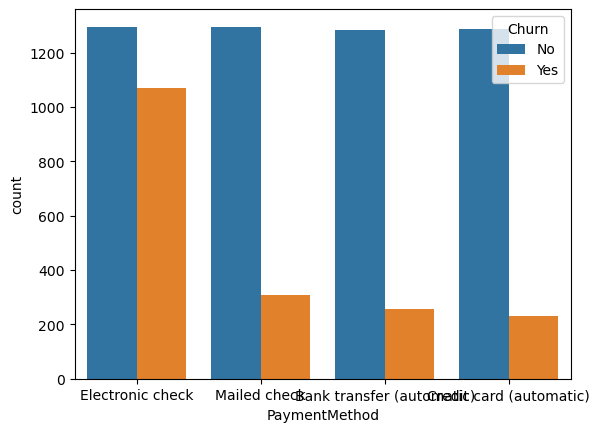

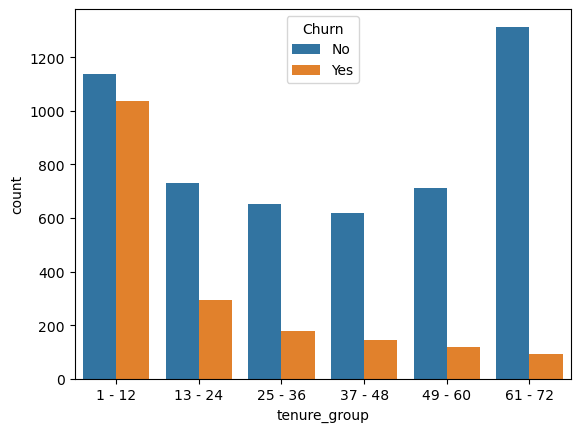

In [19]:
for i, predictor in enumerate(df1.drop(columns=['Churn', 'TotalCharges',"MonthlyCharges"])):
        plt.figure(i)
        sns.countplot(data=df1, x=predictor, hue="Churn")

2. Convert the target varable "Churn" in a binary numeric variable i.e Yes = 1 : No = 0  

In [20]:
df1["Churn"].replace({"Yes": 1, "No": 0} ,inplace=True)

3. Convert all the Categorical Variables into dummy variables **df2**

In [21]:
df2 = pd.get_dummies(df1)
df2.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


9. Relationship between Monthly Charges and Total Charges 

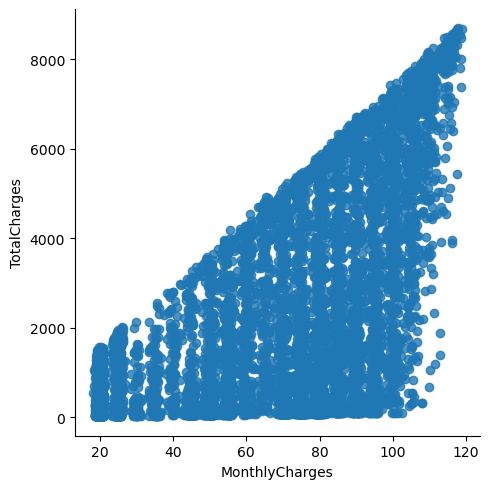

In [22]:
sns.lmplot(data=df2 , x="MonthlyCharges", y="TotalCharges", fit_reg=False)

Total Charges increases as Monthly Charges increases - as expected.


10. Churn by Monthly charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

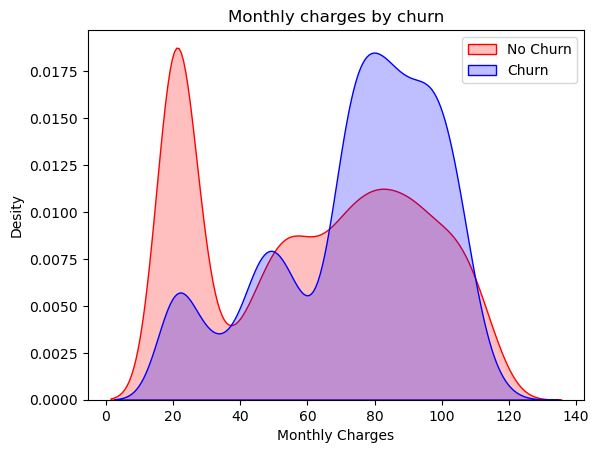

In [23]:
mth = sns.kdeplot(df2["MonthlyCharges"][(df2["Churn"] ==0 ) ], 
                 color ='Red', fill=True)
#It only taking those records from monthly charges where Churn value is 0 
mth = sns.kdeplot(df2["MonthlyCharges"][(df2["Churn"] ==1 ) ], 
                 ax=mth , color ='Blue', fill=True)

mth.legend(['No Churn','Churn'], loc='upper right')
mth.set_ylabel("Desity")
mth.set_xlabel("Monthly Charges")
mth.set_title("Monthly charges by churn")

Text(0.5, 1.0, 'Monthly charges by churn')

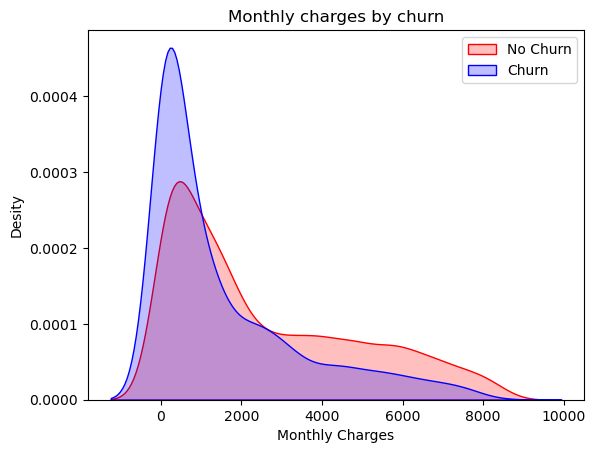

In [24]:
tot = sns.kdeplot(df2["TotalCharges"][(df2["Churn"] ==0 )], 
                 color ='Red', fill=True)
#It only taking those records from monthly charges where Churn value is 0 
tot = sns.kdeplot(df2["TotalCharges"][(df2["Churn"] ==1 ) ], 
                 ax=tot , color ='Blue', fill=True)
tot.legend(['No Churn','Churn'], loc='upper right')
tot.set_ylabel("Desity")
tot.set_xlabel("Monthly Charges")
tot.set_title("Monthly charges by churn")

**Superising Insight** as higher Churn at lower Total Charges

However If we combine the insights of 3 parameters i.e Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure result into lower total Charge. Hence all these 3 factore  **Higher Monthly Charge, Lower tenure** and **Lower Total Charge** are linked to **High Churn**

11. Build a corelation of all predictors with Churn

<Axes: >

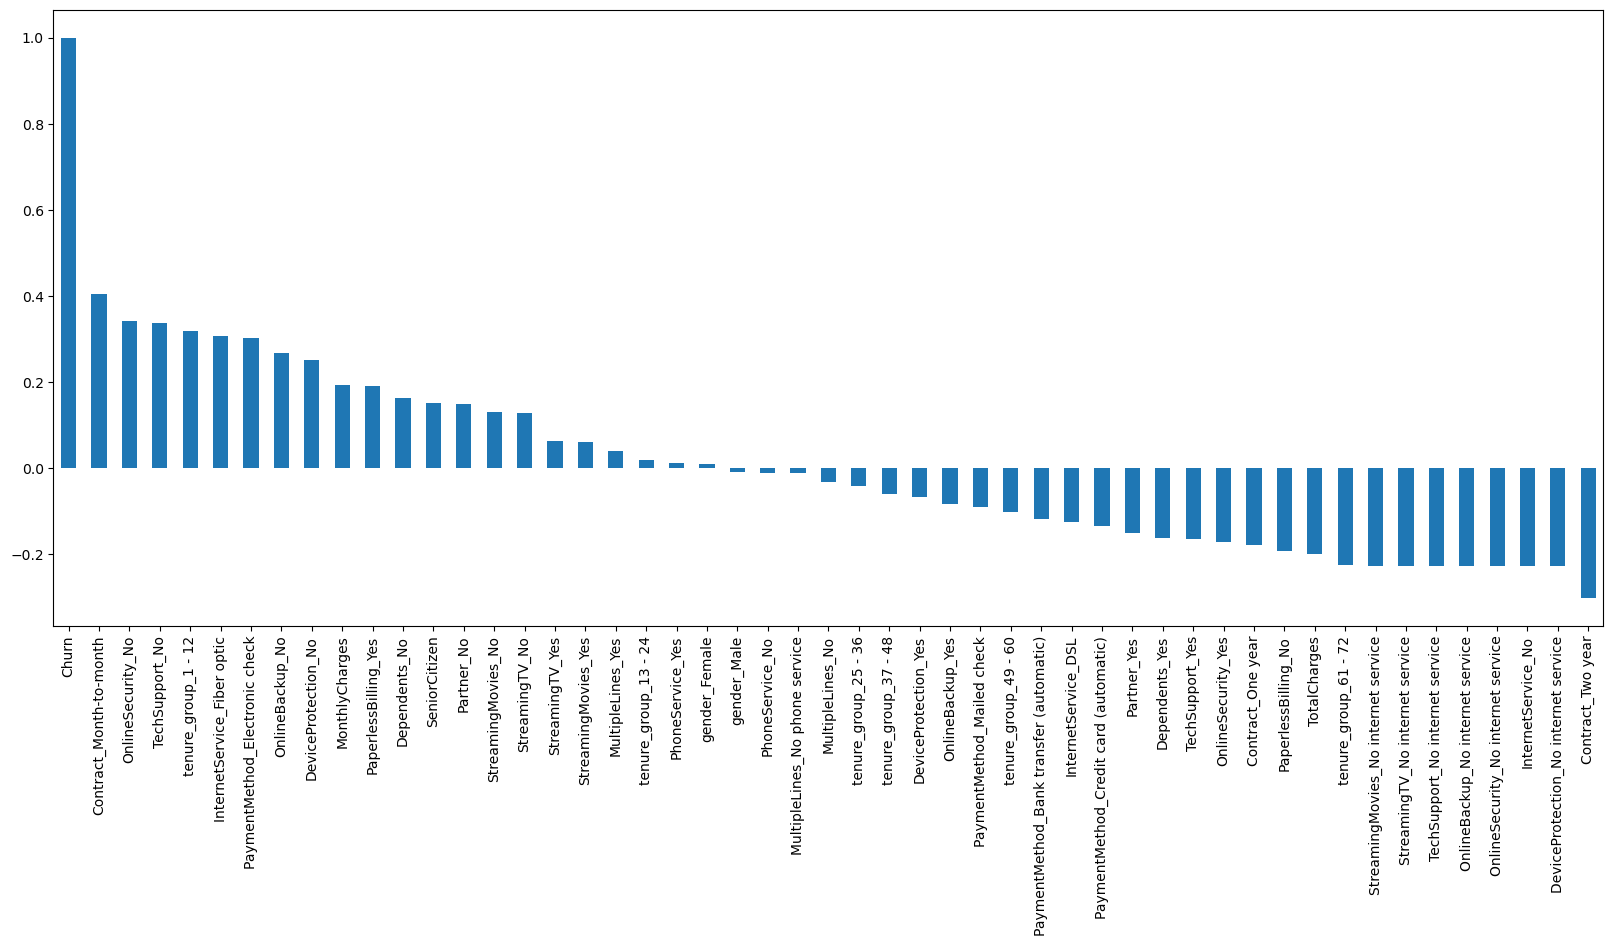

In [25]:
plt.figure(figsize=(20,8))
df2.corr()["Churn"].sort_values(ascending=False).plot(kind='bar')

**Derived Insights**
 
**High** Churn seen in case of **Month of month contracts, No online security, No Tech support , First year of sbscription** and **Fiber optics Internet**

**Low** Churn is seen in case of **Long term contracts, Subcriptions without internet service** and **The customers engaged fro 5+ years**

Factors like **Gender, Availability of PhoneService** and **Multiple Line** have almost **NO** impact on Churn 

This is also evident from the **Heatmap** below

<Axes: >

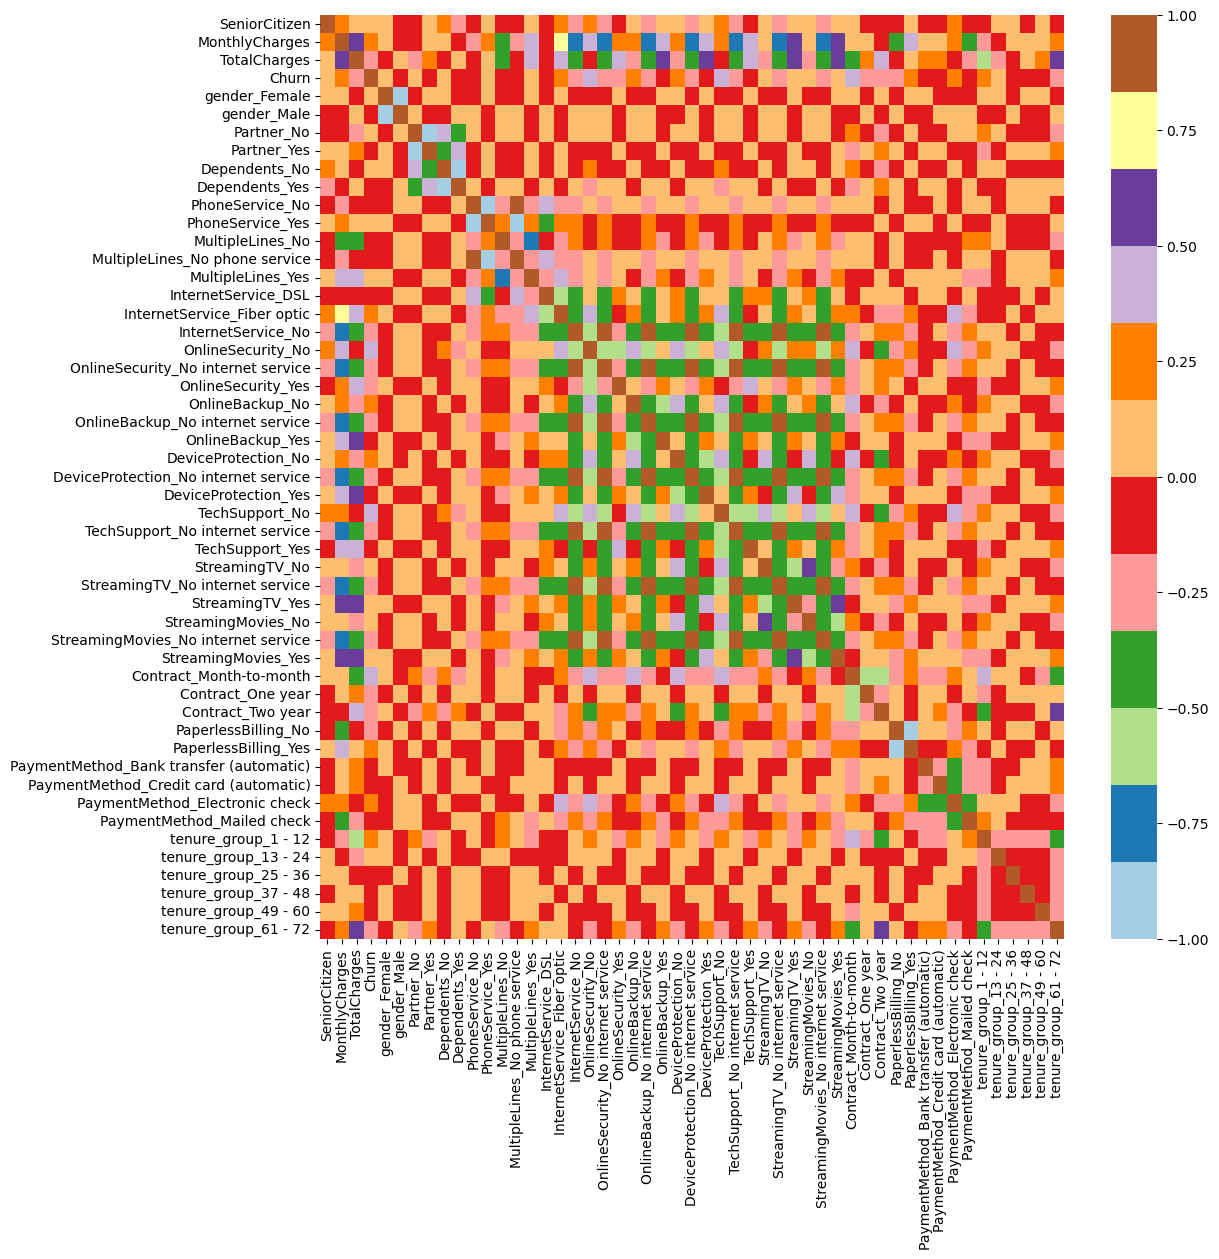

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(), cmap="Paired")

## Bivariate Analysis

In [27]:
new_target0=df1[df1["Churn"]==0] 
new_target1 = df1[df1["Churn"]==1]


In [28]:
def uniplot(df, col , title, hue=None):
    
    sns.set_style("whitegrid")
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] =20
    plt.rcParams["axes.titlesize"] =22
    plt.rcParams["axes.titlepad"] =30
    
    temp= pd.Series(data=hue)
    fig, ax= plt.subplots()
    width = len(df[col].unique()) + 7 + 4 *len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    plt.show()
    

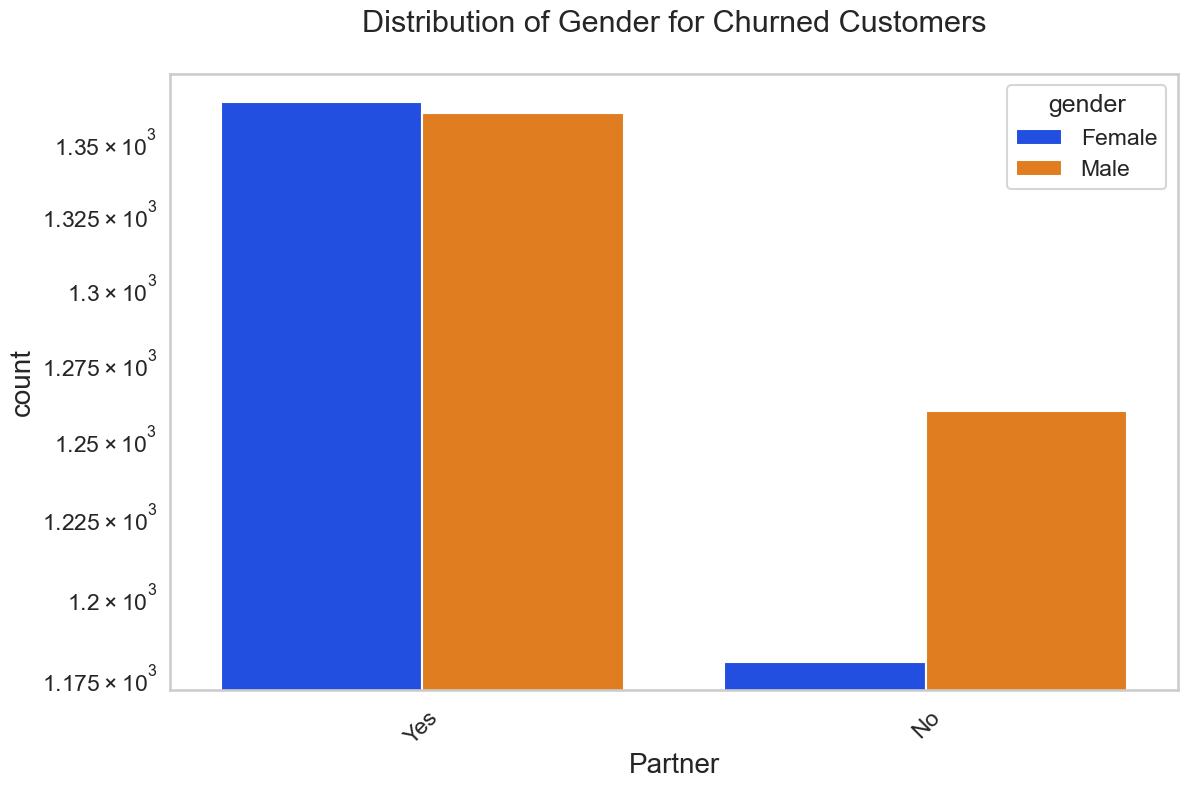

In [29]:
uniplot(new_target0 , col="Partner", title="Distribution of Gender for Churned Customers",hue="gender")

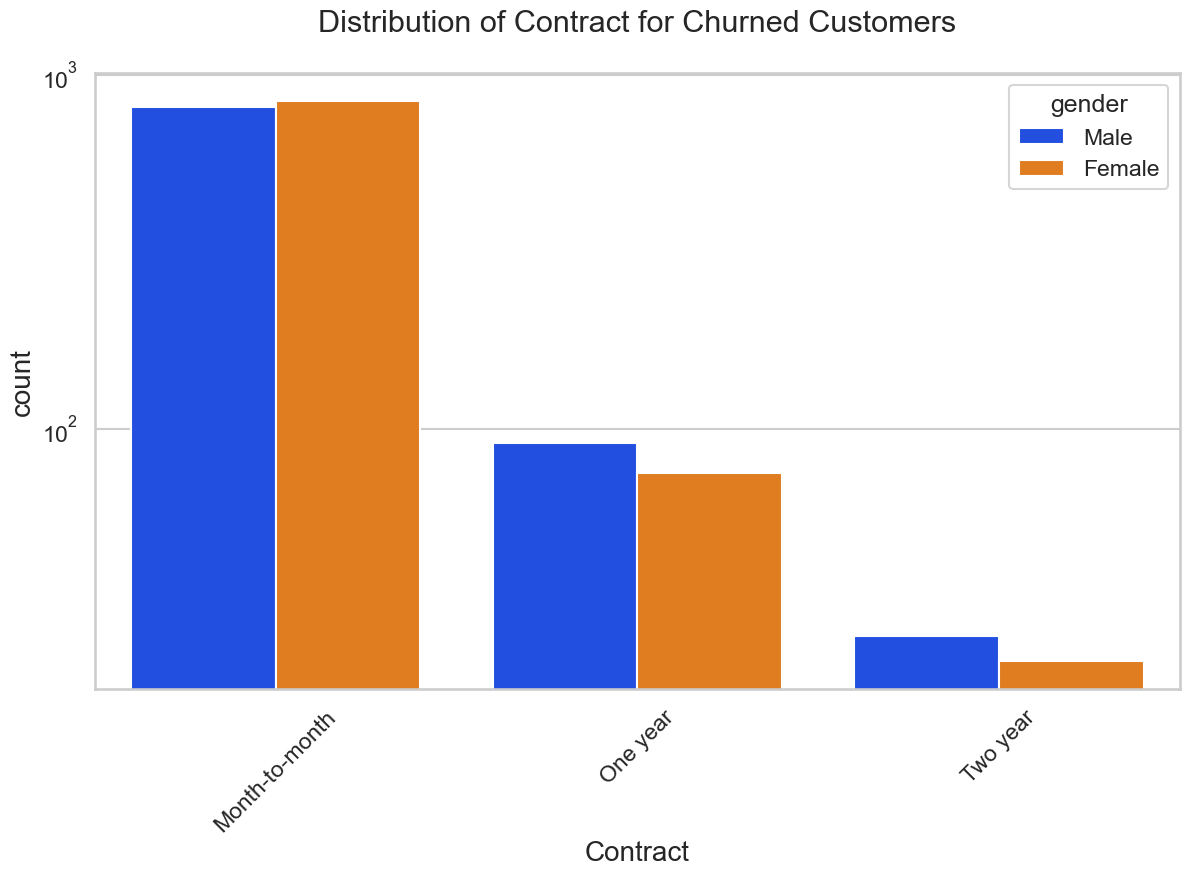

In [30]:
uniplot(new_target1 , col="Contract", title="Distribution of Contract for Churned Customers",hue="gender")

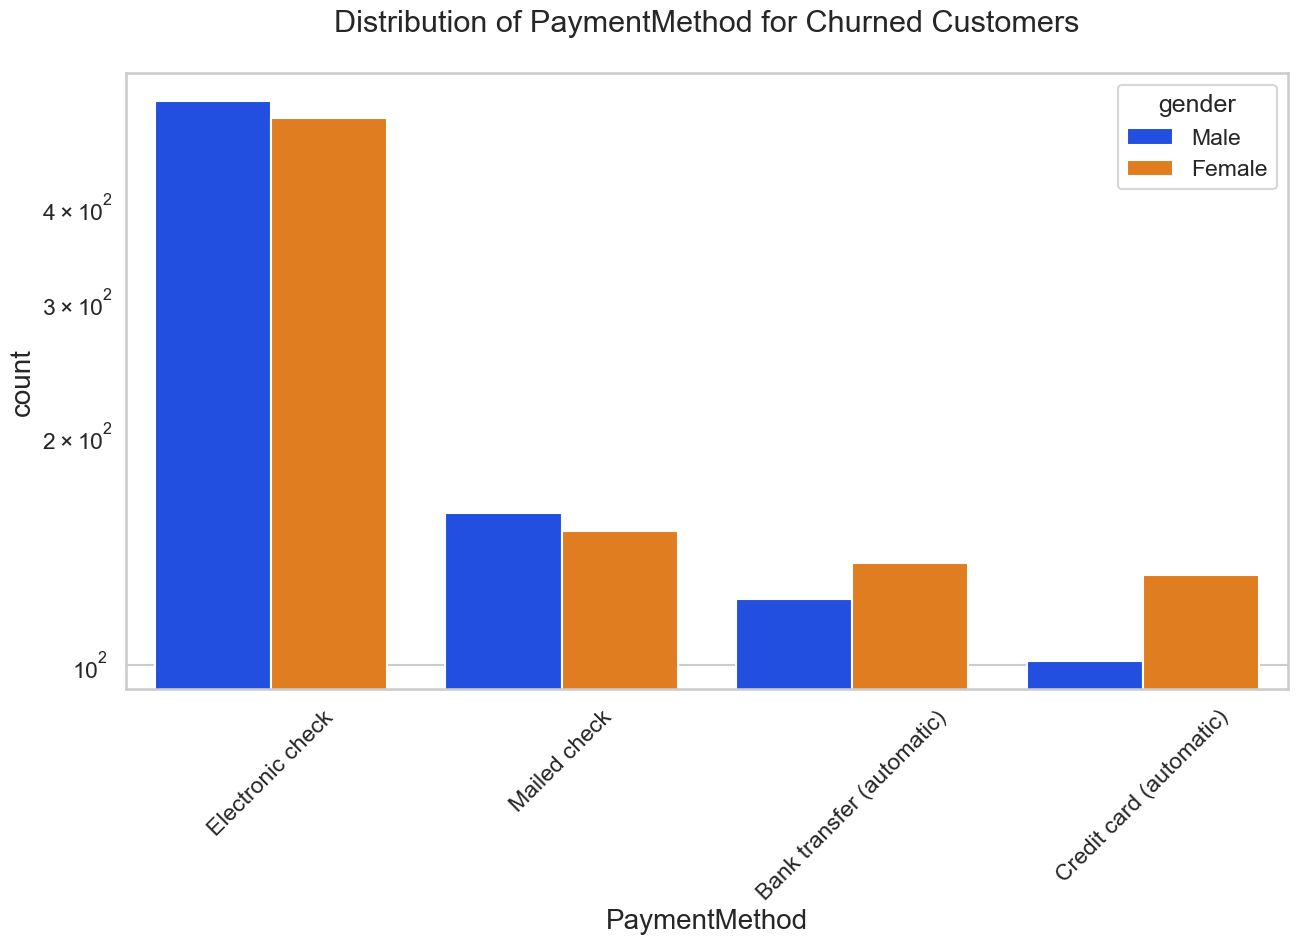

In [31]:
uniplot(new_target1 , col="PaymentMethod", title="Distribution of PaymentMethod for Churned Customers",hue="gender")

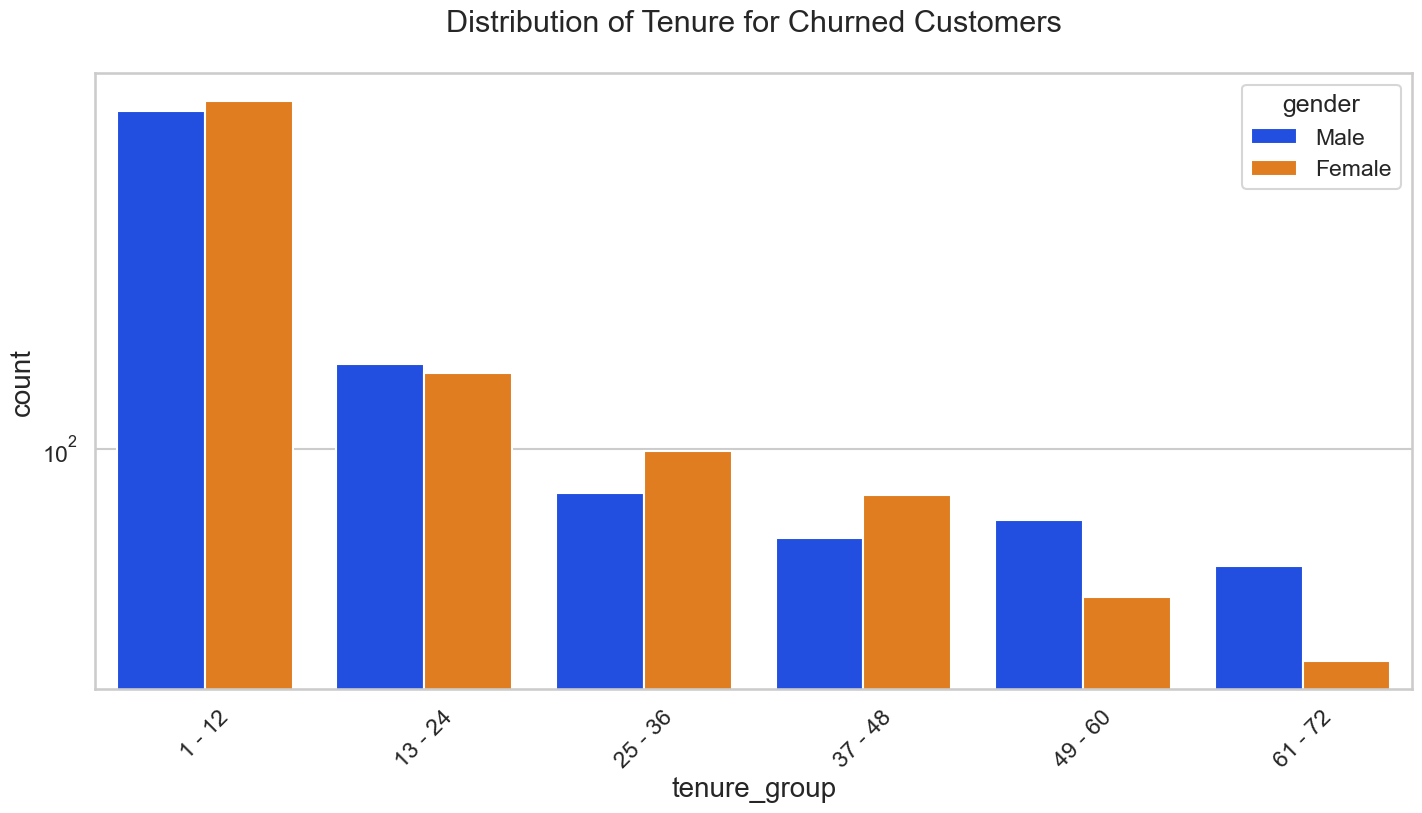

In [32]:
uniplot(new_target1 , col="tenure_group", title="Distribution of Tenure for Churned Customers",hue="gender")

# Conslusion

These are some of the quick insights from this excercise:

1. Electronic Check medium are the highest Churners
2. Contract Type -Monthly Customers are more likely to churn because of no contract terms, as they are free to go customers
3. No online security,No tech support category are high churners
4. Non senior Citizen are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights: 

In [33]:
# df2.to_csv("Churn_clean.csv")